<a href="https://colab.research.google.com/github/kumarmohit0911/AAA/blob/main/IROC_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
image_path = '/content/mars_train_image.webp'

In [30]:
from torch.utils.data import DataLoader,Dataset
from PIL import Image

In [31]:
class CustomDataset(Dataset):
  def __init__(self,image_path,transforms=None):
    self.images = []
    self.image_path = image_path
    self.transforms = transforms
    image = Image.open(image_path).convert('RGB')
    if self.transforms:
      image = self.transforms(image)
    self.images.append(image)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    return self.images[index]


In [36]:
from torchvision.transforms import transforms
custom_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.2
    ),
    transforms.ToTensor()
])

In [37]:
train_img = CustomDataset(image_path)

In [49]:
img1_loader = DataLoader(train_img)

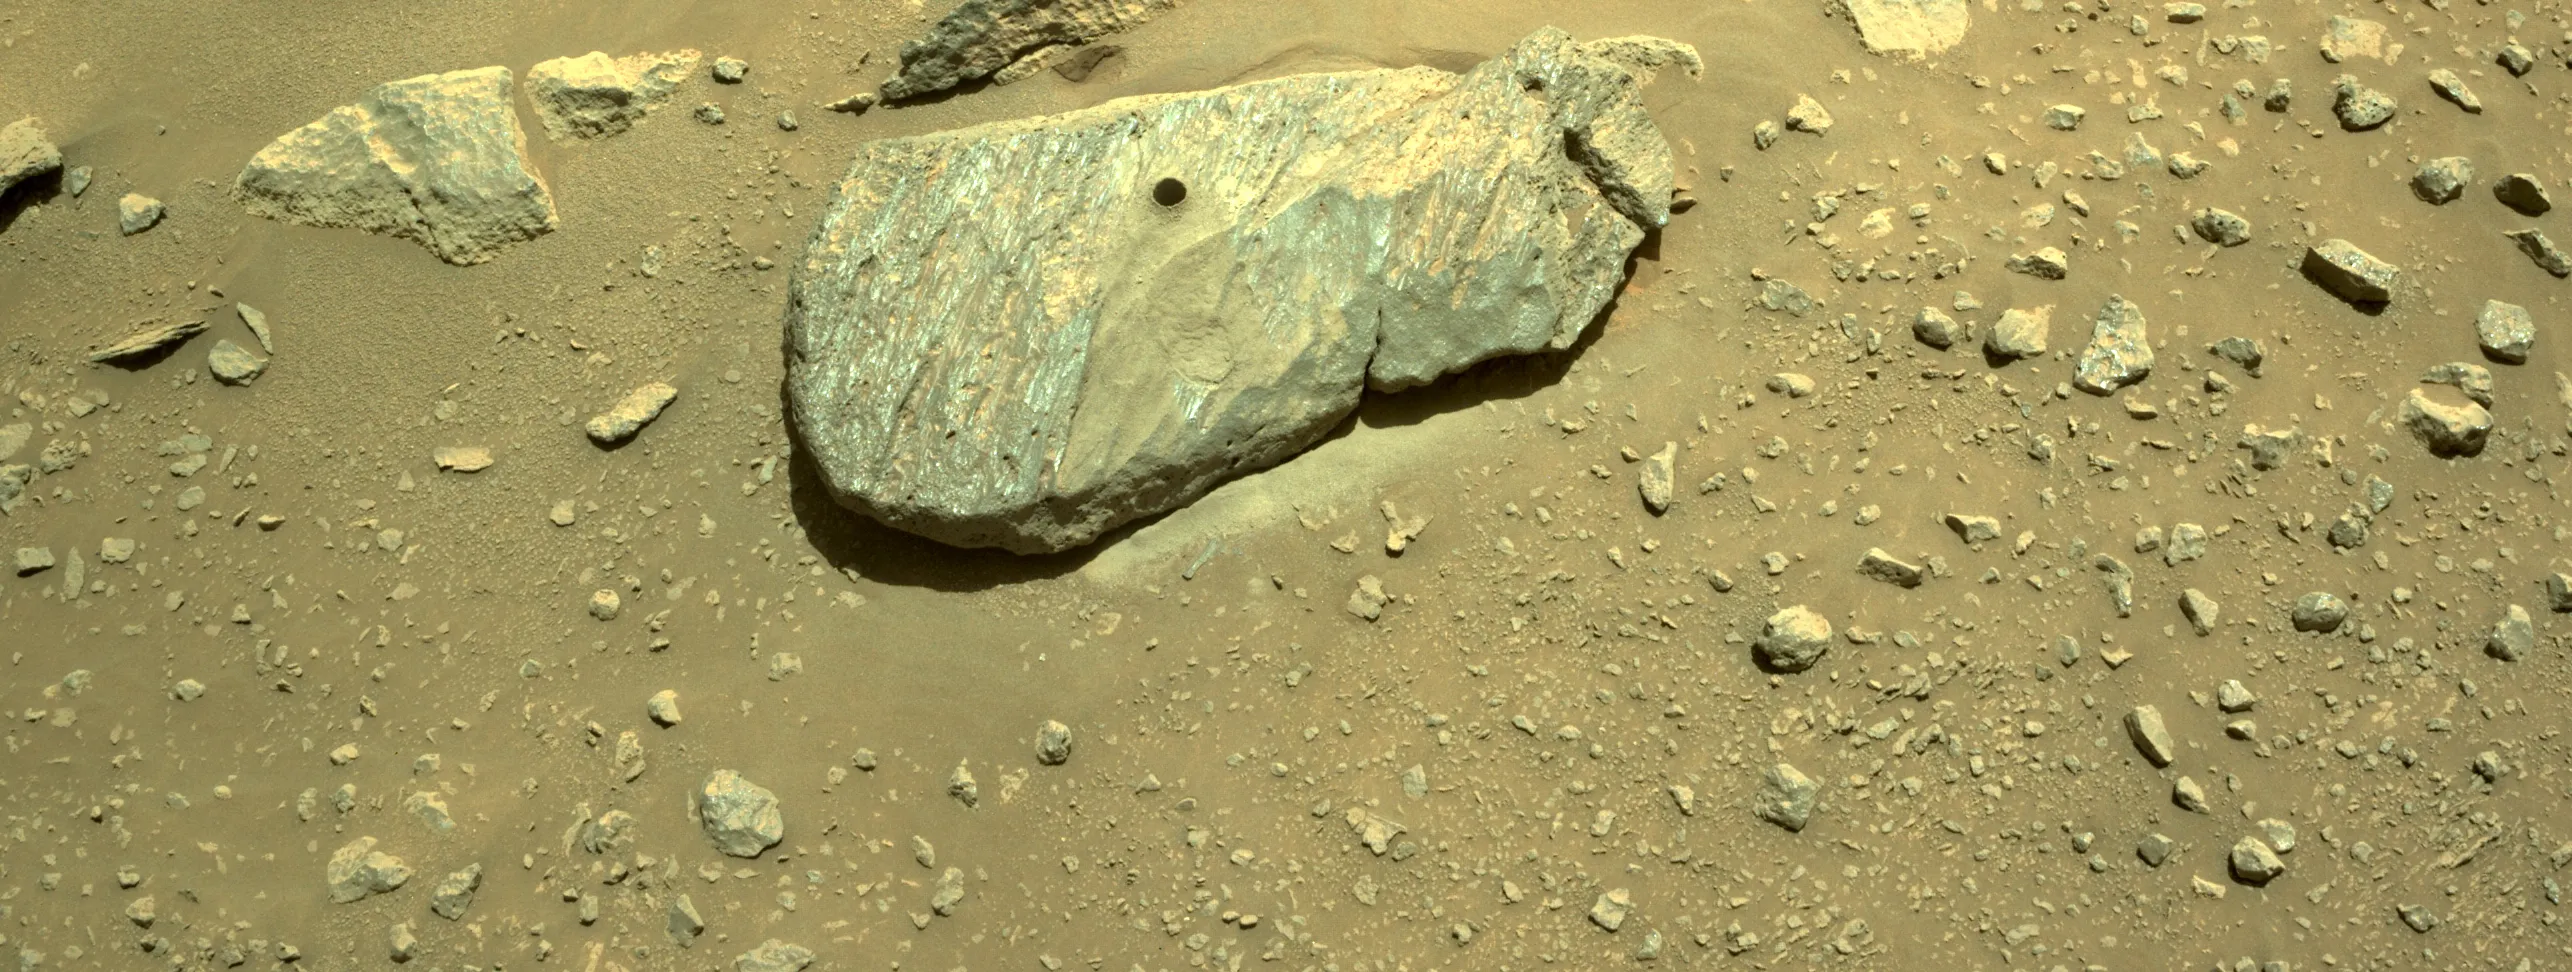

In [38]:
train_img[0]

In [39]:
import torch
import torch.nn as nn


In [44]:
import torch.nn.functional as F
class MyNN(nn.Module):
  def __init__(self,input_feature):
    super().__init__()
    self.feature = nn.Sequential(
        nn.Conv2d(input_feature,32,kernel_size=3,padding = 'same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(32,64,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(64,128,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(128,128,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(128,256,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2)
    )
  def forward(self,x):
    x = self.feature(x)
    x = F.adaptive_avg_pool2d(x, 1)          # (B, 256, 1, 1)
    x = x.view(x.size(0), -1)                # (B, 256)

    return x

In [56]:
model = MyNN(3)

In [53]:
emb1 = model(train_img.shape[0])
# emb2 = model(img2)


AttributeError: 'CustomDataset' object has no attribute 'shape'